In [38]:
# 做一些简单的数据清洗工作

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)
sns.set(style='whitegrid', font='simhei')

In [40]:
from utils import *

In [41]:
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)

# 处理trip数据：
1. 剔除测试数据，不合理的GPS数据，修正一些可修复数据
2. 为每一个subtrip添加距离
3. 按日期重新分配

In [42]:
path = r'D:\Zhejiang University\Graduate Project\Data\Data\Cleaned\trip.csv'
data = pd.read_csv(path).iloc[:, 1:]
data.head()

,用户ID,星期,日期,Trip_ID,出行目的,第几次出行,出发地点经纬度,出发地点名义信息,到达地点经纬度,到达地点名义信息,...,年龄,宿舍区,年级,专业大类,自行车保有,电动车保有,汽车保有,校内主要出行方式,校外主要出行方式,Source
0,iOSiOS,﻿Thu,2018/03/08,iOSiOS0000,1,0,"('0', '0')",hhhstart,"('0', '0')",hhhend,...,None,None,None,None,None,None,None,None,None,iOS
1,iOSiOS,Thu,2018/03/08,iOSiOS0001,1,1,"('0', '0')",hhhstart,"('0', '0')",hhhend,...,None,None,None,None,None,None,None,None,None,iOS
2,iOSlalala,Thu,2018/03/08,iOSlalala0000,1,0,"('0', '0')",hhhstart,"('0', '0')",hhhend,...,None,None,None,None,None,None,None,None,None,iOS
3,iOSlalala,Thu,2018/03/08,iOSlalala0001,1,1,"('0', '0')",hhhstart,"('0', '0')",hhhend,...,None,None,None,None,None,None,None,None,None,iOS
4,aiOS,Thu,2018/03/08,aiOS0000,1,0,"('0', '0')",hhhstartiOS,"('0', '0')",hhhendiOS,...,None,None,None,None,None,None,None,None,None,iOS


In [43]:
# 统计用户ID信息，剔除不合理的
persons = data['用户ID'].unique()
persons

array(['iOSiOS', 'iOSlalala', 'aiOS', 'testfromiOS', 'testiOS', 'a331',
       '868233037531058', 'fff', 'ffff', 'fffff', '99000661510877',
       'lalala', '7BA36027-572D-4A66-9BED-16E514776D7A',
       'AA80BA72-454E-4FC3-B08C-E71BE39795DE', '862828038803111',
       '866952039548511', '9E7108A8-1CE5-4205-9F84-FFF591ACF296',
       '352575073151131', nan, '866111031277674', '868464032175811',
       'B3CBF519-A0E8-4E59-89CD-A0010CFD04B2',
       '1B9E6765-2FF2-41BF-8746-8B7F8B90C634',
       'E481BA02-683F-4D39-BF1C-D2511F38748D', '99001028893689',
       '1BA8B59E-1EDE-4C06-9440-73BD8A6D8D9B',
       '9F8854F0-6B11-45D1-9ECC-F4CEDDB7567D',
       '5EAE71AB-B3E1-4248-ABF8-AF93FA4F7A14',
       'A9640936-2976-4043-AEBC-E4C46392F7CA', '862891032124520',
       '866342032675489', '867977033978538', '864360036109489',
       '7DF282B6-CF38-4B98-974C-62CB593B7737',
       '47A65412-C863-4CAB-B6AC-0312BDB9F290',
       '460FAD4B-1357-45A6-8AEB-504F8E716CAD', '866296033225316',
       '7A07

In [44]:
# 剔除 iOSiOS, iOSlalala, aiOS, testfromiOS, testiOS, a331, fff, ffff, fffff, lalala, nan
persons = data['用户ID'].unique()
p = list(persons)
p.remove(p[18])
not_wanted = ['iOSiOS', 'iOSlalala', 'aiOS', 'testfromiOS', 'testiOS', 'a331', 'fff', 'ffff', 'fffff', 'lalala']
wanted = delete_user(p,not_wanted)
data = data[data['用户ID'].isin(wanted)]
persons = data['用户ID'].unique()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033 entries, 16 to 1083
Data columns (total 39 columns):
用户ID        1033 non-null object
星期          1033 non-null object
日期          1033 non-null object
Trip_ID     1033 non-null object
出行目的        1033 non-null int64
第几次出行       1033 non-null int64
出发地点经纬度     1033 non-null object
出发地点名义信息    999 non-null object
到达地点经纬度     1033 non-null object
到达地点名义信息    880 non-null object
出行距离        1033 non-null float64
出发时间        1033 non-null object
达到时间        1033 non-null object
出发时         1033 non-null int64
出发分         1033 non-null int64
到达时         1033 non-null int64
到达分         1033 non-null int64
出行时间        1033 non-null int64
出行方式总数      1033 non-null int64
主要出行方式      1033 non-null int64
出行方式1       1033 non-null int64
用时1         1033 non-null int64
出行方式2       1033 non-null object
用时2         1033 non-null object
出行方式3       1033 non-null object
用时3         1033 non-null object
出行方式4       1033 non-null object
用时4         1

C:\Users\yuhao\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\yuhao\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\yuhao\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

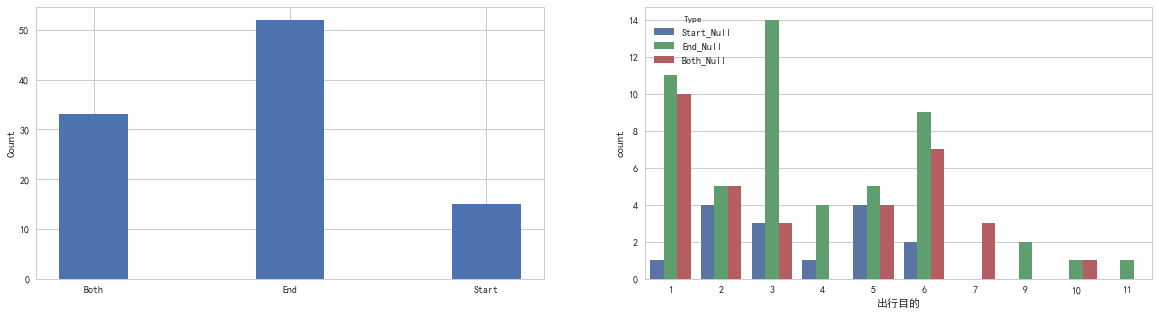

In [45]:
# GPS问题
start_gps = data['出发地点经纬度']
end_gps = data['到达地点经纬度']
# 无效GPS数据为 ('0', '0')
start_null = data[(start_gps == "('0', '0')") & (end_gps != "('0', '0')")]
end_null = data[(end_gps == "('0', '0')") & (start_gps != "('0', '0')")]
both_null = data[(start_gps == "('0', '0')") & (end_gps == "('0', '0')")]
null_gps_data = data[(start_gps == "('0', '0')") | (end_gps == "('0', '0')")]

# 绘制图像
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(20, 5))
axis1.bar(['Start', 'End', 'Both'], [start_null.count()[0], end_null.count()[0], both_null.count()[0]], width=0.35)
axis1.set_ylabel('Count')

# 处理数据
start_null['Type'] = 'Start_Null'
end_null['Type'] = 'End_Null'
both_null['Type'] = 'Both_Null'
gps_null = pd.concat([start_null, end_null, both_null], ignore_index=True)
sns.countplot(x='出行目的', data=gps_null, hue='Type', ax=axis2)

['办事', '上课', '就餐', '自习', '购物', '回寝室', '社团活动', '学术活动', '娱乐活动', '就医', '其他']
- 由上图一可知，End缺失时情况最多，并且集中于目的1, 3, 6
- Start缺失情况较分散
- both缺失集中于1，2，3，5，6
- 其中3和6的情况比较好确定，一般为大食堂和自己的寝室

In [46]:
# 首先处理回寝室的缺失
# 回寝室即End位置为寝室

## 1.收集所有人寝室的位置

In [47]:
dormitory = pd.DataFrame(columns=['用户ID', 'GPS', '名义信息'])
num = 0
for person in persons:
    p_data = data[data['用户ID'] == person]
    d_area = list(p_data[p_data['出行目的'] == 6]['到达地点经纬度'])
    d_info = list(p_data[p_data['出行目的'] == 6]['到达地点名义信息'])
    area = None
    info = None
    if d_area != area:
        for i in range(len(d_area)):
            if d_area[i] != "('0', '0')":
                area = d_area[i]
                info = d_info[i]
                break
    if area != None:
        dormitory.loc[num, :] = [person, area, info]
    num += 1

## 2.收集所有人就餐的位置

In [48]:
dinning_hall = pd.DataFrame(columns=['用户ID', 'GPS', '名义信息'])
num = 0
for person in persons:
    p_data = data[data['用户ID'] == person]
    d_area = list(p_data[p_data['出行目的'] == 3]['到达地点经纬度'])
    d_info = list(p_data[p_data['出行目的'] == 3]['到达地点名义信息'])
    print(person, '############################################')
    for i in range(len(d_area)):
        print(d_area[i], '###', d_info[i])
    print('                                                      ')

868233037531058 ############################################
                                                      
99000661510877 ############################################
                                                      
7BA36027-572D-4A66-9BED-16E514776D7A ############################################
                                                      
AA80BA72-454E-4FC3-B08C-E71BE39795DE ############################################
                                                      
862828038803111 ############################################
                                                      
866952039548511 ############################################
('30.313753019905633', '120.09099699999993') ### 浙江省杭州市西湖区迪臣中路浙江大学紫金港校区内,浙江大学(紫金港校区)-本科生院求是学院西183米
('30.3147480192541', '120.08876499999992') ### 浙江省杭州市西湖区迪臣路浙江大学(紫金港校区)内,浙江大学求是学院蓝田学园内0米
                                                      
9E7108A8-1CE5-4205-9F84-FFF591ACF296 #######################################

In [49]:
for person in persons:
    p_data = data[data['用户ID'] == person]
    d_area = list(p_data[p_data['出行目的'] == 3]['到达地点经纬度'])
    d_info = list(p_data[p_data['出行目的'] == 3]['到达地点名义信息'])
    area = None
    info = None
    if d_area != area:
        for i in range(len(d_area)):
            if d_area[i] != "('0', '0')":
                area = d_area[i]
                info = d_info[i]
                break
    if area != None:
        dinning_hall.loc[num, :] = [person, area, info]
    num += 1
dinning_hall

,用户ID,GPS,名义信息
5,866952039548511,"('30.313753019905633', '120.09099699999993')","浙江省杭州市西湖区迪臣中路浙江大学紫金港校区内,浙江大学(紫金港校区)-本科生院求是学院西183米"
7,352575073151131,"('30.30965790239354', '120.09160345180433')","浙江省杭州市西湖区宜山路浙江大学紫金港校区内,浙江大学(紫金港校区)西教学区1栋-107号楼..."
12,E481BA02-683F-4D39-BF1C-D2511F38748D,"('30.30978895399306', '120.0920553927951')",NaN
13,99001028893689,"('30.313063020358364', '120.09022699999991')","浙江省杭州市西湖区迪臣中路浙江大学紫金港校区内,浙江大学(紫金港校区)-排球场东146米"
16,5EAE71AB-B3E1-4248-ABF8-AF93FA4F7A14,"('30.30761664496528', '120.0835986328125')",浙江省杭州市西湖区三墩镇迪臣中路浙江大学紫金港校区
18,862891032124520,"('30.313610343475627', '120.0910625412362')","浙江省杭州市西湖区迪臣中路浙江大学紫金港校区内,浙江大学(紫金港校区)-本科生院求是学院西178米"
19,866342032675489,"('30.3133307446328', '120.09046385686146')","浙江省杭州市西湖区迪臣中路浙江大学紫金港校区内,浙江大学(紫金港校区)-排球场东182米"
20,867977033978538,"('30.314344585473552', '120.09302460995696')","浙江省杭州市西湖区藉舫路浙江大学紫金港校区内,浙江大学校医院紫金港校区白沙内0米"
21,864360036109489,"('30.31468101929793', '120.08891699999992')","浙江省杭州市西湖区迪臣路浙江大学(紫金港校区)内,浙江大学求是学院蓝田学园内0米"
22,7DF282B6-CF38-4B98-974C-62CB593B7737,"('30.30832275390625', '120.08667860243055')",NaN


## 3.收集就医信息

In [50]:
hospital = pd.DataFrame(columns=['用户ID', 'GPS', '名义信息'])
num = 0
for person in persons:
    p_data = data[data['用户ID'] == person]
    d_area = list(p_data[p_data['出行目的'] == 6]['到达地点经纬度'])
    d_info = list(p_data[p_data['出行目的'] == 6]['到达地点名义信息'])
    area = None
    info = None
    if d_area != area:
        for i in range(len(d_area)):
            if d_area[i] != "('0', '0')":
                area = d_area[i]
                info = d_info[i]
                break
    if area != None:
        hospital.loc[num, :] = [person, area, info]
    num += 1
hospital

,用户ID,GPS,名义信息
0,868233037531058,"('30.275186046373253', '120.13217599999993')","浙江省杭州市西湖区西溪路374号浙江大学玉泉校区内,浙江大学(玉泉校区)-学生公寓26栋北85米"
6,9E7108A8-1CE5-4205-9F84-FFF591ACF296,"('30.315057834201387', '120.21628976779513')",浙江省杭州市江干区笕桥镇机场路368号杭州市江干职业高级中学
9,868464032175811,"('30.31374401991154', '120.09096099999992')","浙江省杭州市西湖区迪臣中路浙江大学紫金港校区内,浙江大学(紫金港校区)-本科生院求是学院西187米"
10,B3CBF519-A0E8-4E59-89CD-A0010CFD04B2,"('30.30851372612847', '120.08667914496527')",浙江省杭州市西湖区三墩镇浙江大学紫金港校区白沙二舍浙江大学紫金港校区
12,E481BA02-683F-4D39-BF1C-D2511F38748D,"('30.31139594184028', '120.0901060655382')",浙江省杭州市西湖区三墩镇望月公寓
13,99001028893689,"('30.313152020299924', '120.07802399999993')",浙江省杭州市西湖区石祥西路华电电力科学研究院东南305米
15,9F8854F0-6B11-45D1-9ECC-F4CEDDB7567D,"('30.310381130642362', '120.08565999348959')",浙江省杭州市西湖区三墩镇泰和路浙江大学紫金港校区
16,5EAE71AB-B3E1-4248-ABF8-AF93FA4F7A14,"('30.30822048611111', '120.0831236436632')",浙江省杭州市西湖区三墩镇迪臣中路浙江大学紫金港校区
18,862891032124520,"('30.31436001374123', '120.09321197636113')","浙江省杭州市西湖区藉舫路浙江大学紫金港校区内,浙江大学(紫金港校区)白沙综合楼-白沙2舍附近40米"
19,866342032675489,"('30.31453878971659', '120.09306925236085')","浙江省杭州市西湖区藉舫路浙江大学紫金港校区内,浙江大学(紫金港校区)白沙综合楼-白沙1舍附近32米"


# 回归分析

In [51]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [52]:
data.head()

,用户ID,星期,日期,Trip_ID,出行目的,第几次出行,出发地点经纬度,出发地点名义信息,到达地点经纬度,到达地点名义信息,...,年龄,宿舍区,年级,专业大类,自行车保有,电动车保有,汽车保有,校内主要出行方式,校外主要出行方式,Source
16,868233037531058,Mon,2018/04/02,8682330375310580000,6,0,"('30.275186046373253', '120.13217599999993')","浙江省杭州市西湖区西溪路374号浙江大学玉泉校区内,浙江大学(玉泉校区)-学生公寓26栋北85米","('30.275186046373253', '120.13217599999993')","浙江省杭州市西湖区西溪路374号浙江大学玉泉校区内,浙江大学(玉泉校区)-学生公寓26栋北85米",...,None,None,None,None,None,None,None,None,None,Android
17,868233037531058,Mon,2018/04/02,8682330375310580001,1,1,"('30.27518504637397', '120.13214299999993')","浙江省杭州市西湖区西溪路374号浙江大学玉泉校区内,浙江大学(玉泉校区)-学生公寓26栋北84米","('30.27516904638545', '120.13215299999993')","浙江省杭州市西湖区西溪路374号浙江大学玉泉校区内,浙江大学(玉泉校区)-学生公寓26栋北83米",...,None,None,None,None,None,None,None,None,None,Android
18,868233037531058,Mon,2018/04/16,8682330375310580002,7,2,"('0', '0')",NaN,"('0', '0')",NaN,...,None,None,None,None,None,None,None,None,None,Android
19,868233037531058,Mon,2018/04/16,8682330375310580003,6,3,"('0', '0')",NaN,"('0', '0')",NaN,...,None,None,None,None,None,None,None,None,None,Android
20,868233037531058,Mon,2018/04/16,8682330375310580004,6,4,"('0', '0')",NaN,"('0', '0')",NaN,...,None,None,None,None,None,None,None,None,None,Android


## 筛选出有效数据
- 日期为2018/04/17-2018/4/23期间
- 具有个人信息的

In [53]:
# 日期在2018/04/17-2018/04/23内
train_data = data[data['日期'].isin(['2018/04/17', '2018/04/18', '2018/04/19', '2018/04/20', '2018/04/21', '2018/04/22', '2018/04/23'])]
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632 entries, 39 to 1077
Data columns (total 39 columns):
用户ID        632 non-null object
星期          632 non-null object
日期          632 non-null object
Trip_ID     632 non-null object
出行目的        632 non-null int64
第几次出行       632 non-null int64
出发地点经纬度     632 non-null object
出发地点名义信息    619 non-null object
到达地点经纬度     632 non-null object
到达地点名义信息    547 non-null object
出行距离        632 non-null float64
出发时间        632 non-null object
达到时间        632 non-null object
出发时         632 non-null int64
出发分         632 non-null int64
到达时         632 non-null int64
到达分         632 non-null int64
出行时间        632 non-null int64
出行方式总数      632 non-null int64
主要出行方式      632 non-null int64
出行方式1       632 non-null int64
用时1         632 non-null int64
出行方式2       632 non-null object
用时2         632 non-null object
出行方式3       632 non-null object
用时3         632 non-null object
出行方式4       632 non-null object
用时4         632 non-null object
性别     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 39 to 1077
Data columns (total 39 columns):
用户ID        586 non-null object
星期          586 non-null object
日期          586 non-null object
Trip_ID     586 non-null object
出行目的        586 non-null int64
第几次出行       586 non-null int64
出发地点经纬度     586 non-null object
出发地点名义信息    574 non-null object
到达地点经纬度     586 non-null object
到达地点名义信息    503 non-null object
出行距离        586 non-null float64
出发时间        586 non-null object
达到时间        586 non-null object
出发时         586 non-null int64
出发分         586 non-null int64
到达时         586 non-null int64
到达分         586 non-null int64
出行时间        586 non-null int64
出行方式总数      586 non-null int64
主要出行方式      586 non-null int64
出行方式1       586 non-null int64
用时1         586 non-null int64
出行方式2       586 non-null object
用时2         586 non-null object
出行方式3       586 non-null object
用时3         586 non-null object
出行方式4       586 non-null object
用时4         586 non-null object
性别     

C:\Users\yuhao\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


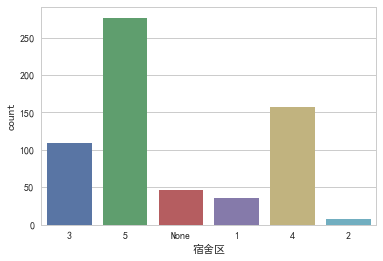

In [54]:
# 舍弃无个人信息的数据
sns.countplot(x='宿舍区', data=train_data)
train_data = train_data[train_data['宿舍区'].isin(['1', '2', '3', '4', '5'])]
train_data.info()

### 1.出发时间
按照上课时间划分:6:30前,6:30-8:00,8:00-9:35,9:35-9:50,9:50-11:25,11:25-13:15,13:15-14:05,14:05-15:40,15:40-15:55,15:55-17:30,17:30-18:30,18:30-20:05,20:05-20:55,20:55-22:30,22:30-23:30,23:30-次日6:30

In [55]:
time_list = ['6:31-8:00', '8:01-9:35', '9:36-9:50', '9:51-11:25', '11:26-13:15', '13:16-14:05', '14:06-15:40', '15:41-15:55', 
             '15:51-17:30', '17:31-18:30', '18:31-20:05', '20:06-20:55', '20:56-22:30', '22:31-23:30', '23:31-24:00', '0:01-6:30']

def calculate_time(time_list):
    discrete = list()
    for time in time_list:
        start, end = time.split('-')
        start_hour, start_minute = start.split(':')
        end_hour, end_minute = end.split(':')
        start_minutes = int(start_hour) * 60 + int(start_minute)
        end_minutes = int(end_hour) * 60 + int(end_minute)
        discrete.append((start_minutes, end_minutes))
    return discrete
discrete = calculate_time(time_list)

def discrete_time(time):
    """
    把时间按划分好间隔分配
    """
    time_list = ['6:31-8:00', '8:01-9:35', '9:36-9:50', '9:51-11:25', '11:26-13:15', '13:16-14:05', '14:06-15:40', '15:41-15:55', 
             '15:51-17:30', '17:31-18:30', '18:31-20:05', '20:06-20:55', '20:56-22:30', '22:31-23:30', '23:31-24:00', '0:01-6:30']
    discrete = calculate_time(time_list)
    hour, minute = time.split(':')
    hour = int(hour)
    minute = int(minute)
    if hour == 24 and minute > 0:
        hour -= 24
    minutes = hour * 60 + minute
    for i in range(len(discrete)):
        if minutes >= discrete[i][0] and minutes <= discrete[i][1]:
            return i

In [56]:
train_data['time'] = train_data['出发时间'].apply(discrete_time)
train_data['time'].astype('int')

39       3
40       4
41       3
107      1
118      6
119      6
120      7
121      8
122      9
123      0
124      8
125     15
126      9
132      6
140     10
141     10
142     15
143     10
144     10
145     15
146     10
147     10
154      3
155      4
156      4
157      4
158      8
159      9
160      1
171     15
        ..
1048    10
1049    10
1050    12
1051    14
1052    15
1053    15
1054    15
1055    15
1056     6
1057     6
1058     9
1059    10
1060    11
1061    15
1062    15
1063    15
1064    15
1065     8
1066     8
1067    15
1068    15
1069    15
1070     8
1071    11
1072    11
1073    15
1074    15
1075    10
1076    10
1077    14
Name: time, Length: 586, dtype: int32

### 2.专业大类
将专业大类转化编号

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 39 to 1077
Data columns (total 41 columns):
用户ID        586 non-null object
星期          586 non-null object
日期          586 non-null object
Trip_ID     586 non-null object
出行目的        586 non-null int64
第几次出行       586 non-null int64
出发地点经纬度     586 non-null object
出发地点名义信息    574 non-null object
到达地点经纬度     586 non-null object
到达地点名义信息    503 non-null object
出行距离        586 non-null float64
出发时间        586 non-null object
达到时间        586 non-null object
出发时         586 non-null int64
出发分         586 non-null int64
到达时         586 non-null int64
到达分         586 non-null int64
出行时间        586 non-null int64
出行方式总数      586 non-null int64
主要出行方式      586 non-null int64
出行方式1       586 non-null int64
用时1         586 non-null int64
出行方式2       586 non-null object
用时2         586 non-null object
出行方式3       586 non-null object
用时3         586 non-null object
出行方式4       586 non-null object
用时4         586 non-null object
性别     

C:\Users\yuhao\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
C:\Users\yuhao\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


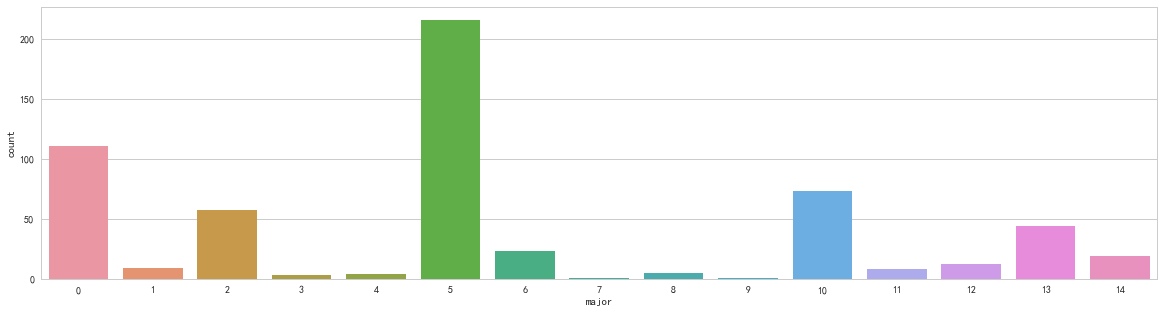

In [57]:
# 初始化
le = preprocessing.LabelEncoder()
le.fit(train_data['专业大类'])
train_data['major'] = le.transform(train_data['专业大类'])
ax = plt.subplots(figsize=(20, 5))
print(train_data.info())
sns.countplot(x='major', data=train_data)
print(le.inverse_transform(range(12)))

### 3.主要出行方式
- 校内主要出行方式6种，其中3可以表示为[0,0,1,0,0,0,0]
- 校外主要出行方式10种，其中3-8-9可表示为[0,0,1,0,0,0,0,1,1,0]

Text(0.5,0,'校外主要出行方式')

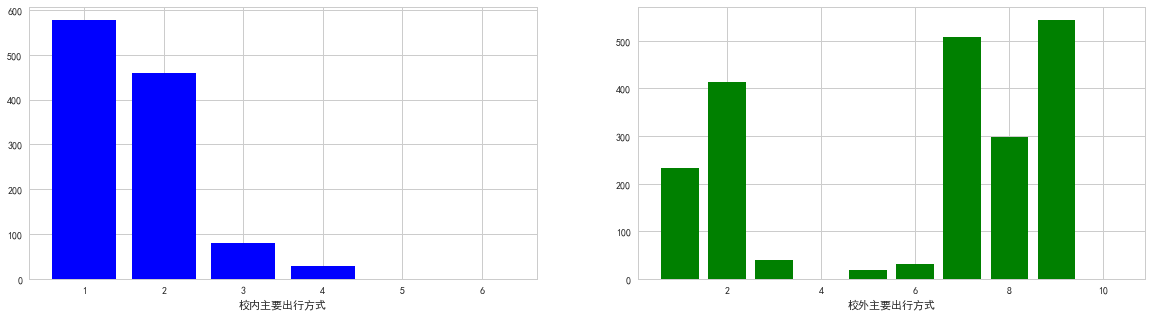

In [58]:
main_mode_in_college = np.zeros(7)
main_mode_out_college = np.zeros(11)
main_in_college = np.zeros((train_data.shape[0], 7))
main_out_college = np.zeros((train_data.shape[0], 11))
lines = train_data.shape[0]

i = 0
for line in train_data.index:
    in_college, out_college = train_data.loc[line, ['校内主要出行方式', '校外主要出行方式']]
    in_colleges = in_college.split('-')
    out_colleges = out_college.split('-')
    for mode in in_colleges:
        main_mode_in_college[int(mode)] += 1
        main_in_college[i, int(mode)] = 1
    for mode in out_colleges:
        main_mode_out_college[int(mode)] += 1
        main_out_college[i, int(mode)] = 1
    i += 1
    
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(20, 5))
axis1.bar(list(range(7))[1:], main_mode_in_college[1:], color='b')
axis1.set_xlabel('校内主要出行方式')
axis2.bar(list(range(11))[1:], main_mode_out_college[1:], color='g')
axis2.set_xlabel('校外主要出行方式')

In [59]:
for i in range(6):
    name = 'in' + str(i+1)
    train_data[name] = main_in_college[:, i+1]
for j in range(10):
    name = 'out' + str(j+1)
    train_data[name] = main_out_college[:, j+1]
train_data.head()

,用户ID,星期,日期,Trip_ID,出行目的,第几次出行,出发地点经纬度,出发地点名义信息,到达地点经纬度,到达地点名义信息,...,out1,out2,out3,out4,out5,out6,out7,out8,out9,out10
39,866952039548511,Tue,2018/04/17,8669520395485110000,3,0,"('30.31474601925541', '120.08876399999993')","浙江省杭州市西湖区迪臣路蓝田内,百果园(泰和路)西南122米","('30.313753019905633', '120.09099699999993')","浙江省杭州市西湖区迪臣中路浙江大学紫金港校区内,浙江大学(紫金港校区)-本科生院求是学院西183米",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
40,866952039548511,Tue,2018/04/17,8669520395485110001,6,1,"('30.313753019905633', '120.09099699999993')","浙江省杭州市西湖区迪臣中路浙江大学紫金港校区内,浙江大学(紫金港校区)-本科生院求是学院西183米","('0', '0')",NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
41,866952039548511,Thu,2018/04/19,8669520395485110002,3,2,"('30.314508019411125', '120.08876399999993')","浙江省杭州市西湖区迪臣路浙江大学(紫金港校区)内,浙江大学求是学院蓝田学园内0米","('30.3147480192541', '120.08876499999992')","浙江省杭州市西湖区迪臣路浙江大学(紫金港校区)内,浙江大学求是学院蓝田学园内0米",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
107,866111031277674,Fri,2018/04/20,8661110312776740003,1,3,"('28.157757089814023', '113.00000670722785')",湖南省长沙市雨花区韶山中路698号酥香世家(韶山路店)附近30米,"('28.157649001244007', '112.99768499999999')","湖南省长沙市雨花区雨花巷31湖南省地质矿产勘查开发局职工医院内,地矿医院宿舍楼北63米",...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
118,B3CBF519-A0E8-4E59-89CD-A0010CFD04B2,Wed,2018/04/18,B3CBF519-A0E8-4E59-89CD-A0010CFD04B20003,2,3,"('30.30842502170139', '120.08672173394098')",浙江省杭州市西湖区三墩镇浙江大学紫金港校区白沙二舍浙江大学紫金港校区,"('30.30844943576389', '120.08667588975695')",浙江省杭州市西湖区三墩镇浙江大学紫金港校区白沙二舍浙江大学紫金港校区,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### 4.处理年龄
- 使年龄从1开始

In [60]:
def get_age(age):
    new_age = int(age) - 18
    return new_age
train_data['age'] = train_data['年龄'].apply(get_age)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 39 to 1077
Data columns (total 58 columns):
用户ID        586 non-null object
星期          586 non-null object
日期          586 non-null object
Trip_ID     586 non-null object
出行目的        586 non-null int64
第几次出行       586 non-null int64
出发地点经纬度     586 non-null object
出发地点名义信息    574 non-null object
到达地点经纬度     586 non-null object
到达地点名义信息    503 non-null object
出行距离        586 non-null float64
出发时间        586 non-null object
达到时间        586 non-null object
出发时         586 non-null int64
出发分         586 non-null int64
到达时         586 non-null int64
到达分         586 non-null int64
出行时间        586 non-null int64
出行方式总数      586 non-null int64
主要出行方式      586 non-null int64
出行方式1       586 non-null int64
用时1         586 non-null int64
出行方式2       586 non-null object
用时2         586 non-null object
出行方式3       586 non-null object
用时3         586 non-null object
出行方式4       586 non-null object
用时4         586 non-null object
性别     

In [61]:
train = train_data.loc[:, ['出行目的', 'time', '性别', 'age', '宿舍区', '年级', 'major', '自行车保有', '电动车保有', '汽车保有',
                          'in1', 'in2', 'in3', 'in4', 'in5', 'in6',
                          'out1', 'out2', 'out3', 'out4', 'out5', 'out6', 'out7', 'out8', 'out9', 'out10',
                          '主要出行方式']]
train.head()

,出行目的,time,性别,age,宿舍区,年级,major,自行车保有,电动车保有,汽车保有,...,out2,out3,out4,out5,out6,out7,out8,out9,out10,主要出行方式
39,3,3,2,1,3,1,3,2,2,2,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1
40,6,4,2,1,3,1,3,2,2,2,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1
41,3,3,2,1,3,1,3,2,2,2,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1
107,1,1,1,3,5,4,7,2,2,2,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
118,2,6,1,4,5,4,5,2,2,2,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1


In [62]:
# 特征还要加上校内外主要出行方式的向量表示方法
y = np.array(train_data['主要出行方式'])
y.astype('int')

x = np.array(train_data.loc[:, ['出行目的', 'time', '性别', 'age', '宿舍区', '年级', 'major', '自行车保有', '电动车保有', '汽车保有',
                          'in1', 'in2', 'in3', 'in4', 'in5', 'in6',
                          'out1', 'out2', 'out3', 'out4', 'out5', 'out6', 'out7', 'out8', 'out9', 'out10',]])
x.astype('int')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

### 逻辑回归

In [63]:
lr = LogisticRegression(C=1.0, penalty='l1', tol=0.0001, solver='liblinear')
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
lr.fit(x_train_std, y_train)
score_of_lr = lr.score(x_test_std, y_test)
result = lr.predict(x_test_std)
prob = lr.predict_proba(x_test_std)
print(score_of_lr)
print(lr.coef_)

0.7551020408163265
[[-0.01792987  0.27998878  0.         -0.01933929  0.         -0.68274804
   0.09056061 -0.6838866   0.          0.          0.         -0.06184439
  -0.29133679  0.          0.          0.          0.          0.8122317
   0.          0.          0.17557364 -0.44689745  0.         -0.59269512
   0.55570327  0.        ]
 [ 0.14924314 -0.04303893 -0.25293388 -0.60670358 -0.05319559  1.24422298
   0.          1.27869654  0.          0.          0.23370479  0.51527461
  -0.09102337  0.13665644  0.          0.         -0.78007877 -0.15630939
  -0.11629896  0.          0.          0.26031656  0.03724774 -0.31120063
   0.06756234  0.        ]
 [-0.14115414  0.          0.396387    0.20572497  0.19833805 -0.78395689
   0.         -1.31206237  0.00221832  0.         -0.24973272 -0.46250225
   0.00841333 -0.20391703  0.          0.          0.83744756 -0.01677866
   0.          0.         -0.03486635 -0.11491556  0.          0.57979911
  -0.16439615  0.        ]
 [ 0.        

C:\Users\yuhao\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### 支持向量机

In [64]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(random_state=0)
lsvc.fit(x_train_std, y_train)
score_of_svc = lsvc.score(x_test_std, y_test)
print(score_of_svc)
print(lsvc.coef_)

0.7551020408163265
[[-4.33089491e-02  9.66193159e-02 -3.16105334e-01 -3.88271312e-02
  -2.87574016e-01 -5.46667078e-01 -3.43204266e-01 -3.39713834e-01
   3.77564812e-03  0.00000000e+00 -1.35577932e-01 -1.38427998e-01
  -6.30520322e-02  3.20377008e-02  0.00000000e+00  0.00000000e+00
   1.05712809e-01  4.90013575e-01 -9.15372421e-02  0.00000000e+00
   2.04612555e-01 -1.26558328e-01  5.03128912e-01  1.86796156e-01
   9.82240911e-01  0.00000000e+00]
 [ 6.45960248e-02 -2.64615650e-02 -4.82789386e-02 -3.09323322e-01
   9.83386369e-03  5.83415617e-01  1.81632004e-02  4.47277948e-01
  -1.49792362e-01  0.00000000e+00  1.04126131e-01  2.10719561e-01
  -1.20081226e-01  7.20226786e-02  0.00000000e+00  0.00000000e+00
  -3.26920273e-01 -5.50931921e-02 -6.65594559e-02  0.00000000e+00
   2.93274358e-02  1.24217708e-01  6.55913690e-03 -2.00253428e-01
   5.51998253e-02  0.00000000e+00]
 [-5.17465682e-02  8.77874708e-03  6.83939262e-02  2.29046763e-01
   6.12062285e-03 -4.59867429e-01  3.92957731e-03 -3.

### 随机森林

0.7414965986394558


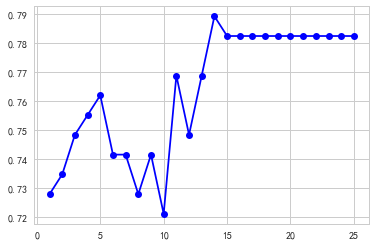

In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6, random_state=0)
rfc.fit(x_train_std, y_train)
score_of_rfc = rfc.score(x_test_std, y_test)
print(score_of_rfc)
scores = [0]
for i in range(1, 26):
    rfc = RandomForestClassifier(max_depth=i, random_state=0)
    rfc.fit(x_train_std, y_train)
    scores.append(rfc.score(x_test_std, y_test))
plt.plot(list(range(26))[1:], scores[1:], 'bo-')

In [66]:
# 深度为14时效果最好
rfc = RandomForestClassifier(max_depth=14, random_state=0)
rfc.fit(x_train_std, y_train)
score_of_rfc = rfc.score(x_test_std, y_test)
print(score_of_rfc)

0.7891156462585034
